**Seeding for reproducibility**

In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

 99% 2.03G/2.04G [00:24<00:00, 52.6MB/s]
100% 2.04G/2.04G [00:24<00:00, 88.1MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])


['grayscale', 'color', 'segmented']
38
['Raspberry___healthy', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Blueberry___healthy', 'Pepper,_bell___healthy']
38
['Raspberry___healthy', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Blueberry___healthy', 'Pepper,_bell___healthy']
38
['Raspberry___healthy', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Blueberry___healthy', 'Pepper,_bell___healthy']


Number of Classes =**38**

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['1180dbb8-4509-4f56-a5f6-15ceac163ff9___Mt.N.V_HL 8928.JPG', '811f5365-f5a3-4659-8302-009fb5275541___Mt.N.V_HL 8946.JPG', 'fe54a9e2-461a-457b-a391-f6e3cc99605c___Mt.N.V_HL 9093.JPG', '8c5181ab-8b06-41a8-9b26-b3be052dcea1___Mt.N.V_HL 8905.JPG', 'da331356-edd4-4803-9347-412929330c11___Mt.N.V_HL 6142.JPG']


**Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


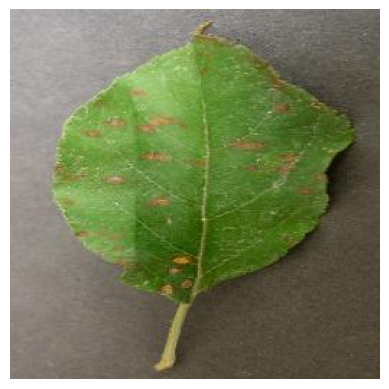

In [ ]:

image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)


[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [ ]:

# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)


In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 [==============================] - 107s 75ms/step - loss: 0.9845 - accuracy: 0.7315 - val_loss: 0.4957 - val_accuracy: 0.8449
Epoch 2/5
1358/1358 [==============================] - 106s 78ms/step - loss: 0.2960 - accuracy: 0.9061 - val_loss: 0.4353 - val_accuracy: 0.8638
Epoch 3/5
1358/1358 [==============================] - 108s 79ms/step - loss: 0.1455 - accuracy: 0.9527 - val_loss: 0.4348 - val_accuracy: 0.8834
Epoch 4/5
1358/1358 [==============================] - 104s 76ms/step - loss: 0.0930 - accuracy: 0.9682 - val_loss: 0.5686 - val_accuracy: 0.8622
Epoch 5/5
1358/1358 [==============================] - 103s 76ms/step - loss: 0.0707 - accuracy: 0.9775 - val_loss: 0.5750 - val_accuracy: 0.8692


**Model Evaluation**

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 [==============================] - 18s 52ms/step - loss: 0.5750 - accuracy: 0.8692
Validation Accuracy: 86.92%


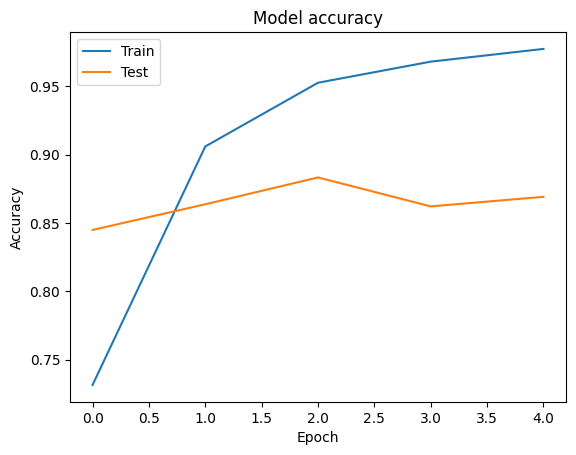

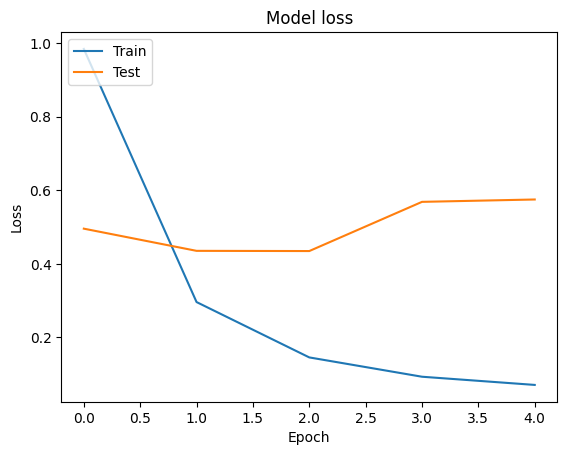

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import json
import io  # Add this import statement for the io module

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(img):
    target_size = (224, 224)  # Define your target size here
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, img, class_indices):
    preprocessed_img = load_and_preprocess_image(img)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

# Function to handle file upload and prediction
def handle_upload(model, class_indices):
    # Upload image file via GUI
    uploaded_file = files.upload()

    # Process uploaded image
    for filename in uploaded_file.keys():
        # Read uploaded image file
        img_data = uploaded_file[filename]
        img = Image.open(io.BytesIO(img_data))

        # Predict class of uploaded image
        predicted_class_name = predict_image_class(model, img, class_indices)

        # Output the predicted class name
        print("Predicted Class Name:", predicted_class_name)

        return predicted_class_name

# Example usage
# Provide your trained model and class indices dictionary
#model = your_model
#class_indices = your_class_indices_dict

# Call the function to handle image upload and prediction
handle_upload(model, class_indices)

# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Save the class indices mapping to a JSON file
json.dump(class_indices, open('class_indices.json', 'w'))



Saving apple_rot.jpeg to apple_rot.jpeg
1/1 [==============================] - 0s 283ms/step
Predicted Class Name: Apple___Black_rot


Saving corn.jpeg to corn (3).jpeg


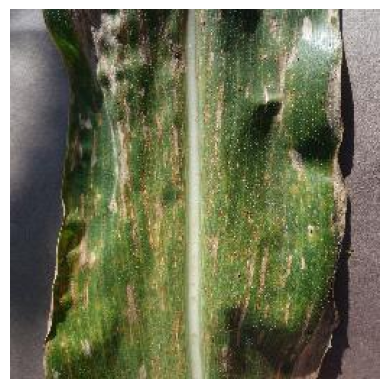

1/1 [==============================] - 0s 34ms/step
Predicted Class Name: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import json
import io
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(img):
    target_size = (224, 224)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, img, class_indices):
    preprocessed_img = load_and_preprocess_image(img)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

# Function to handle file upload and prediction
def handle_upload(model, class_indices):
    uploaded_file = files.upload()

    for filename in uploaded_file.keys():
        img_data = uploaded_file[filename]
        img = Image.open(io.BytesIO(img_data))

        # Plot the uploaded image
        plt.imshow(img)
        plt.axis('off')  # Turn off axis
        plt.show()

        predicted_class_name = predict_image_class(model, img, class_indices)
        print("Predicted Class Name:", predicted_class_name)

        return predicted_class_name



# Call the function to handle image upload and prediction
handle_upload(model, class_indices)

# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Save the class indices mapping to a JSON file
json.dump(class_indices, open('class_indices.json', 'w'))


Saving orange.jpeg to orange (2).jpeg


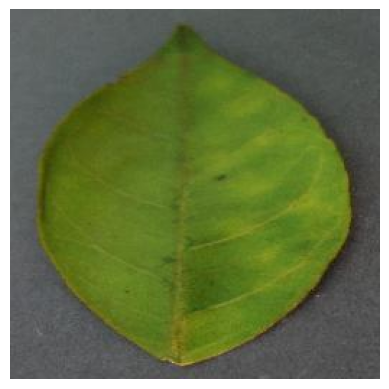

1/1 [==============================] - 0s 168ms/step
Predicted Class Name: Orange___Haunglongbing_(Citrus_greening)


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import json
import io
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(img):
    target_size = (224, 224)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, img, class_indices):
    preprocessed_img = load_and_preprocess_image(img)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

# Function to handle file upload and prediction
def handle_upload(model, class_indices):
    uploaded_file = files.upload()

    for filename in uploaded_file.keys():
        img_data = uploaded_file[filename]
        img = Image.open(io.BytesIO(img_data))

        # Plot the uploaded image
        plt.imshow(img)
        plt.axis('off')  # Turn off axis
        plt.show()

        predicted_class_name = predict_image_class(model, img, class_indices)
        print("Predicted Class Name:", predicted_class_name)

        return predicted_class_name

# Example usage
# Provide your trained model and class indices dictionary
#model = your_model
#class_indices = your_class_indices_dict

# Call the function to handle image upload and prediction
handle_upload(model, class_indices)

# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Save the class indices mapping to a JSON file
json.dump(class_indices, open('class_indices.json', 'w'))
